In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
file_path = r'C:\Users\s563072\GDP-Project-Group5-Functionalities-for-a-stock-prediction-system\Data\MSFT.csv'
df = pd.read_csv(file_path)
df.head()
df.shape


(251, 7)

Text(0.5, 1.0, 'Distribution of Stock Prices')

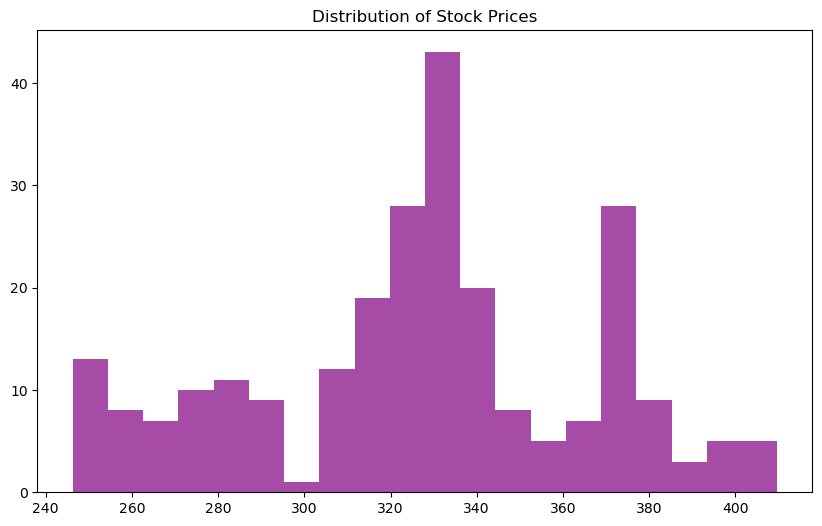

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Stock Prices')


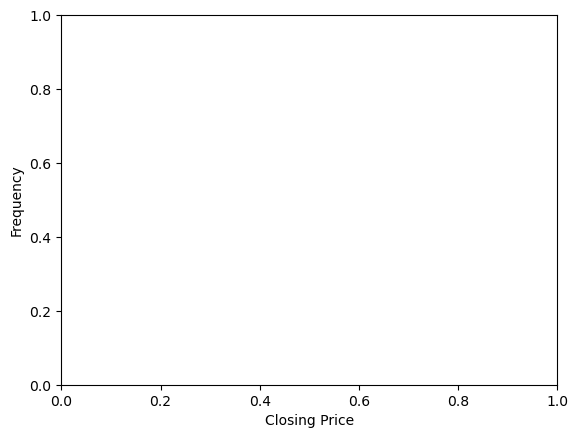

In [12]:

plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

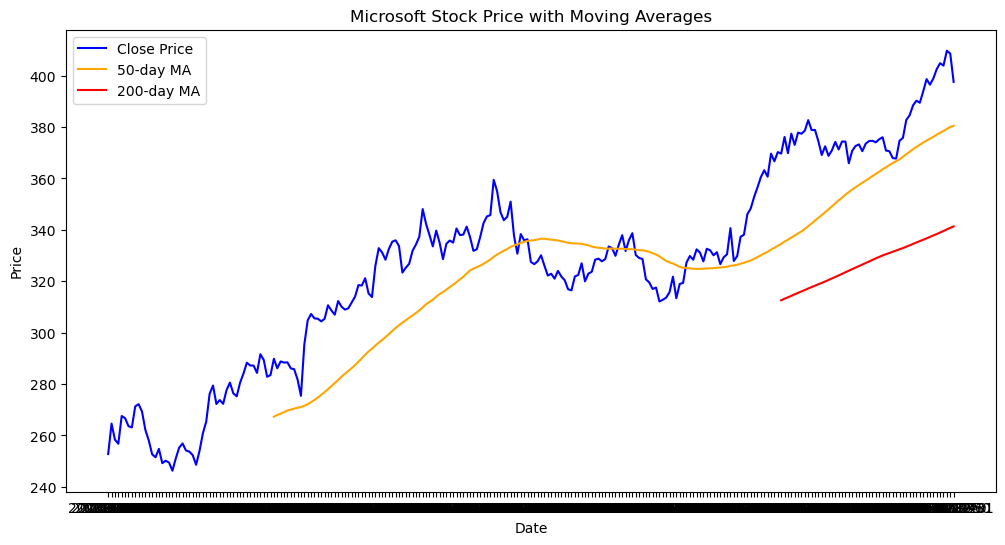

In [13]:

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA50'], label='50-day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-day MA', color='red')
plt.title('Microsoft Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:

df['Date'] = pd.to_datetime(df['Date'])
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)



Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
MA50          49
MA200        199
dtype: int64


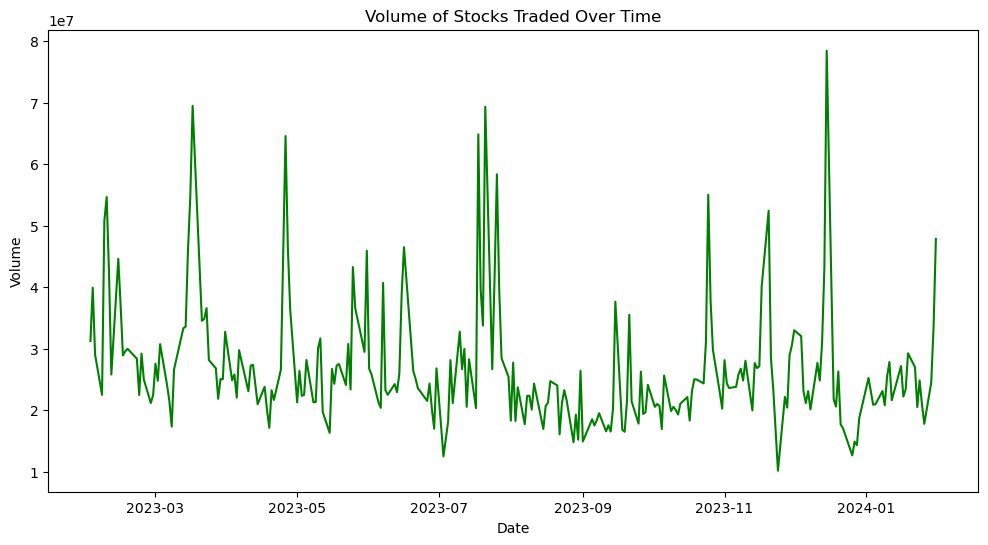

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='green')
plt.title('Volume of Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

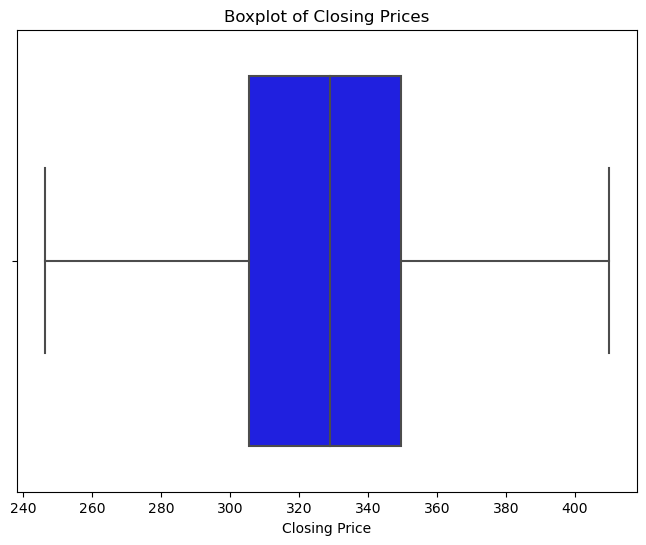

In [17]:
import seaborn as sns
df = df.drop_duplicates()
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'], color='blue')
plt.title('Boxplot of Closing Prices')
plt.xlabel('Closing Price')
plt.show()


In [19]:
q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['Close'] = df['Close'].clip(lower=lower_bound, upper=upper_bound)

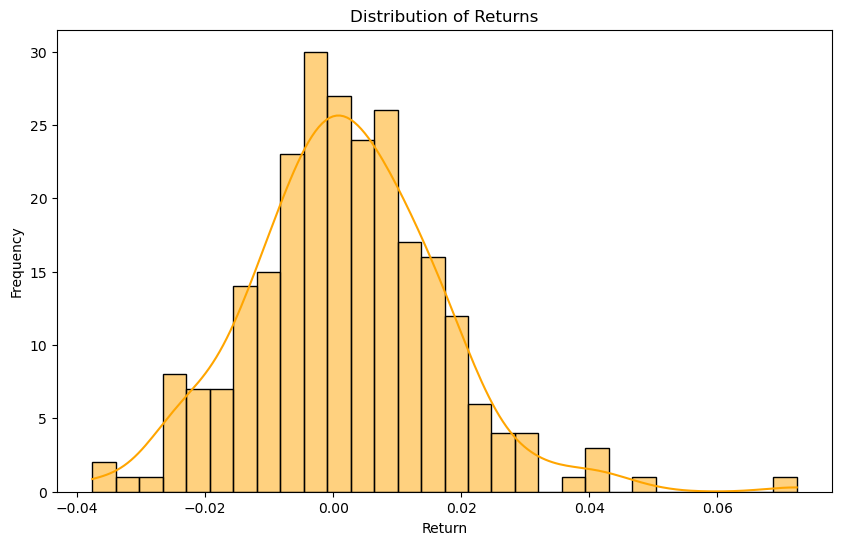

In [20]:
df['Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df['Return'].dropna(), bins=30, color='orange', kde=True)
plt.title('Distribution of Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

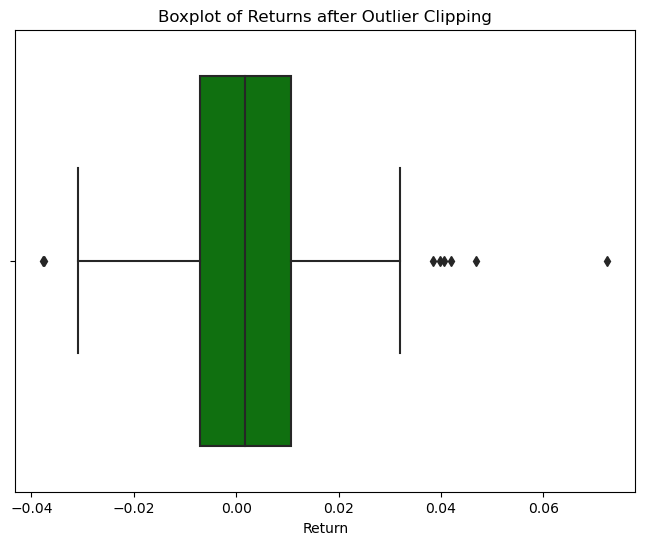

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Return'], color='green')
plt.title('Boxplot of Returns after Outlier Clipping')
plt.xlabel('Return')
plt.show()


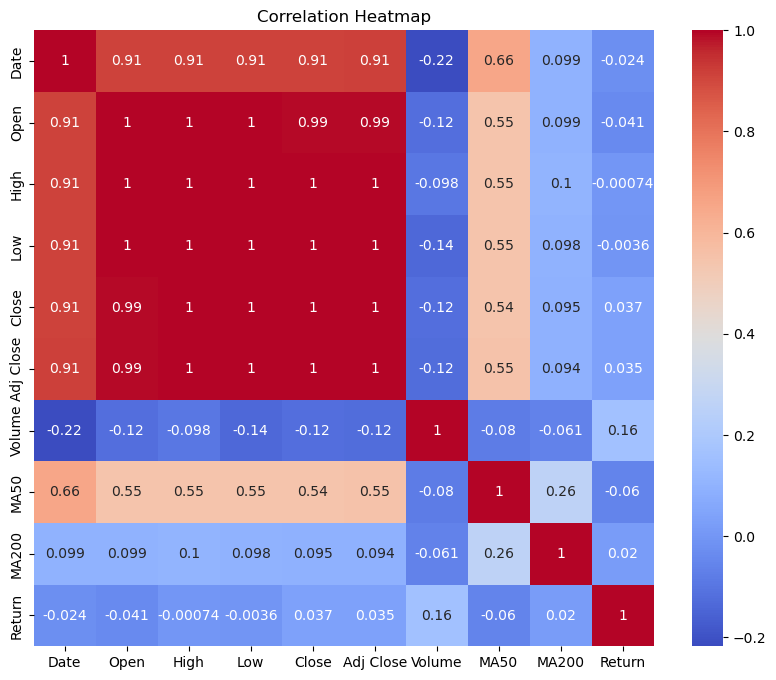

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df[['Open', 'High', 'Low', 'Volume']] 
y = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)


In [ ]:
y_pred_test = model.predict(X_test)


train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_mae = mean_absolute_error(y_train, y_pred_train)


In [ ]:
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


X = df[['Open', 'High', 'Low', 'Volume']]  
y = df['Close']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)


In [ ]:
train_rmse_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)

In [ ]:
train_mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)

In [ ]:
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from ta.trend import MACD
from ta.momentum import RSIIndicator

#dataframe
df = pd.read_csv('MSFT.csv')


df['Daily_Return'] = df['Close'].pct_change()
df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
df['Rolling_Std'] = df['Close'].rolling(window=30).std()

ModuleNotFoundError: No module named 'keras'

In [ ]:
print("Train RMSE (Random Forest):", train_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)
print("Train MAE (Random Forest):", train_mae_rf)
print("Test MAE (Random Forest):", test_mae_rf)
print("Train R^2 Score (Random Forest):", train_r2_rf)
print("Test R^2 Score (Random Forest):", test_r2_rf)

In [ ]:
df['MACD'] = MACD(df['Close']).macd()
df['RSI'] = RSIIndicator(df['Close']).rsi()

X = df[['Open', 'High', 'Low', 'Volume', 'Daily_Return', 'Rolling_Mean', 'Rolling_Std', 'MACD', 'RSI']]
y = df['Close']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

In [ ]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

In [ ]:
gb = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [ ]:
file_path = r'"C:\Users\s562894\Projects\GDP-Project-Group5-Functionalities-for-a-stock-prediction-system\Data\MSFT2.csv"'
df2 = pd.read_csv(file_path)
df2.head()
df2.shape


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X2 = df2[['Open', 'High', 'Low', 'Volume']]
y2 = df2['Close']


X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)


In [ ]:
y2_pred_train = model2.predict(X2_train)
y2_pred_test = model2.predict(X2_test)

In [ ]:
train_rmse2 = mean_squared_error(y2_train, y2_pred_train, squared=False)
test_rmse2 = mean_squared_error(y2_test, y2_pred_test, squared=False)
train_mae2 = mean_absolute_error(y2_train, y2_pred_train)
test_mae2 = mean_absolute_error(y2_test, y2_pred_test)
train_r2_2 = r2_score(y2_train, y2_pred_train)
test_r2_2 = r2_score(y2_test, y2_pred_test)


In [ ]:
print("Train RMSE for Dataset 2:", train_rmse2)
print("Test RMSE for Dataset 2:", test_rmse2)
print("Train MAE for Dataset 2:", train_mae2)
print("Test MAE for Dataset 2:", test_mae2)
print("Train R^2 Score for Dataset 2:", train_r2_2)
print("Test R^2 Score for Dataset 2:", test_r2_2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = df2[['Open', 'High', 'Low', 'Volume', 'Projection']]
y = df2['Close']